# NLP process 
- Text analysis  50%
- Text Transformation 40%
- Model development 5%
- ui application 5%

# text analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(plt.style.available)

In [ ]:
# plt.style.available    --- use to see available themes
plt.style.use('ggplot')

In [ ]:
sns.set_style('whitegrid')

```
pip install nltk
```

In [ ]:
import nltk

In [6]:
nltk.download('all')

[nltk_data]    |   Unzipping corpora\timit.zip.
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\toolbox.zip.
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\treebank.zip.
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\twitter_samples.zip.
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\udhr.zip.
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\udhr2.zip.
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_da

True

In [7]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [11]:
messages = pd.read_csv('../datasets/spam_ham_dataset.csv',index_col=0)
messages.rename({'label':'category'},axis=1,inplace=True)

In [12]:
messages.head()

,category,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 605 to 4807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.6+ KB


In [15]:
messages.category.value_counts()

ham     3672
spam    1499
Name: category, dtype: int64

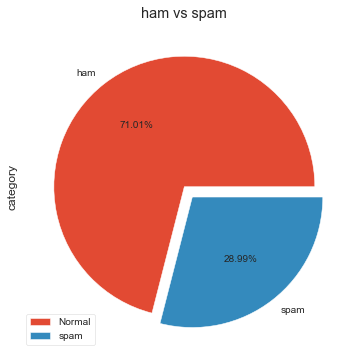

In [16]:
messages.category.value_counts().plot(kind='pie',explode=[0,.1],figsize=(6,6),autopct='%.2f%%')
plt.title("ham vs spam")
plt.legend(['Normal',"spam"])
plt.show()

In [17]:
messages.groupby('text')['category'].agg([len,np.max]).sort_values(by='len',ascending=False).head(10)

,len,amax
text,,
"Subject: calpine daily gas nomination\r\n>\r\nricky a . archer\r\nfuel supply\r\n700 louisiana , suite 2700\r\nhouston , texas 77002\r\n713 - 830 - 8659 direct\r\n713 - 830 - 8722 fax\r\n- calpine daily gas nomination 1 . doc",20,ham
Subject: \r\n,16,spam
Subject: we ' ve found a school for you !\r\n,3,spam
Subject: you can be smart !\r\n,3,spam
"Subject: \r\nthis week only : f . ree gen . erlc vlag . ra\r\ncover the shipping , and we ' ll send youour product at no cost to prove its\r\neffectiveness .\r\nwon ' t last . . . hurry\r\nstop promos .\r\n",3,spam
"Subject: hpl nom for march 30 , 2001\r\n( see attached file : hplno 330 . xls )\r\n- hplno 330 . xls",2,ham
"Subject: hpl nom for march 28 , 2001\r\n( see attached file : hplno 328 . xls )\r\n- hplno 328 . xls",2,ham
"Subject: tenaska iv - - cleburne march 2001\r\nhere is the spreadsheet for march :\r\nthanks ,\r\nmark",2,ham
"Subject: hpl nom for march 29 , 2001\r\n( see attached file : hplno 329 . xls )\r\n- hplno 329 . xls",2,ham


individual spam/ham words

In [19]:
spam_messages = messages[messages['category']=='spam']['text']
ham_messages = messages[messages['category']=='ham']['text']

In [20]:
spam_words= []
ham_words= []

In [21]:
def extract_spam_words(text):
    global spam_words
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    spam_words.extend(words)

def extract_ham_words(text):
    global ham_words
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    ham_words.extend(words)


In [23]:
spam_messages.apply(extract_spam_words)

4685    None
4185    None
4922    None
3799    None
3948    None
        ... 
4381    None
4979    None
4162    None
4365    None
4807    None
Name: text, Length: 1499, dtype: object

In [ ]:
# for word in word_tokenize("i just keep yapping, while my students sleep"):
#     if word.lower() not in stopwords.words('english'):
#         print(word)

In [ ]:
ham_messages.apply(extract_ham_words)
print(ham_words)

In [ ]:
!pip install wordCloud
from wordcloud import WordCloud

In [ ]:
spam_wordcloud = WordCloud(width=600,height=480).generate(" ".join(spam_words))
plt.figure(figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ham_wordcloud = WordCloud(width=800,height=400).generate(" ".join(ham_words))
plt.figure(figsize=(10,8))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
spam_words = np.array(spam_words)
pd.Series(spam_words).value_counts().head(10)

In [ ]:
ham_words = np.array(ham_words)
pd.Series(ham_words).value_counts().head(10)

In [ ]:
messages['messageLength'] = messages['text'].apply(len)
messages.head()

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(messages[messages['category']=='spam']['messageLength'], bins = 20, ax= ax[0])
ax[0].set_xlabel('Spam message word length')
sns.distplot(messages[messages['category']=='ham']['messageLength'], bins = 20, ax= ax[1])
ax[1].set_xlabel('Normal message word length')
plt.show()


# Text Transformation

clean punctuations & stopwords & stemming
- stemming example
    - playing
    - plays
    - *play* - this will be called a stem word also called 'lemma'
    - playable 
    - playthrough

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
def cleanupText(message):
    message =  message.translate(str.maketrans('','',string.punctuation)) # remove basic puncutation
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words('english')]
    return " ".join(words)

In [ ]:
messages.text = messages.text.apply(cleanupText)

In [ ]:
messages.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(encoding='latin1',strip_accents='unicode',stop_words="english")
features = vec.fit_transform(messages.text)
features = features.toarray()

In [ ]:
features.shape

# model application

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
category_enc = LabelEncoder()
messages.category = category_enc.fit_transform(messages.category)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, messages.category, test_size=.2, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
clf = MultinomialNB()
clf.fit(xtrain,ytrain)
ypred =  clf.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytest,ypred)

In [ ]:
clf.score(xtest,ytest)

In [ ]:
fbeta_score(ytest,ypred,beta=1)

In [ ]:
import pickle

In [ ]:
def save_model(model, path="clf.pk"):
    with open(path,'wb') as file:
        pickle.dump(model, file)
    print("success")

In [ ]:
save_model(clf)

In [ ]:
save_model(vec, 'tfidfvec.pk')

In [ ]:
!pip install --upgrade scikit-learn 